## **Name:** First Last

## **Computing ID:** ID

# Lab 1: Pandas and Data Sourcing (50 Points)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xeH0RdILVGKxnHUolCJpj8sSvFylo4c-?usp=sharing)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pydataset import data

## Part 1: Data Structure Review and Pandas Functions (20 Points)

## **Question 1 (10 points):** Read in or load a dataset with at least 3 features. Make a single summary visual that encodes *all* the data in your  DataFrame. Larger DataFrames may be filtered to the 5 most interesting or significant features.

## Utilize the Matplotlib documentation (https://matplotlib.org/stable/gallery/index) as needed. Features like different line or point labels, plot types, color, marker shapes, and even subplots might be necessary!

In [41]:
comp_450_df = pd.DataFrame(pd.read_excel("Comparison_450MHz_10000points_ROvsITM.xlsx"))
#dropping redundant and irrelavent data
comp_450_df = comp_450_df.drop(["Avg diff", "STD diff", "Frequency (MHz)", "Location", "NRQZ ID", "AGL (m)"], axis = 1)
comp_450_df

,Latitude,Longitude,TPA - itmlogic [min],TPA - TAP RO,Difference [itmlogic - RO],Percentage Change [itmlogic / RO],Elevation (m)
0,37.500111,-78.499722,180.290025,199.40,-19.109975,9.583739,179.3
1,37.502111,-78.499722,180.728718,201.45,-20.721282,10.286067,186.0
2,37.504111,-78.499722,180.365875,202.76,-22.394125,11.044646,181.1
3,37.506111,-78.499722,180.232145,202.73,-22.497855,11.097447,187.5
4,37.508111,-78.499722,180.307816,202.73,-22.422184,11.060121,180.0
...,...,...,...,...,...,...,...
9985,38.106111,-80.453722,181.117588,199.76,-18.642412,9.332405,1028.7
9986,38.108111,-80.453722,185.895670,204.33,-18.434330,9.021842,1012.7
9987,38.110111,-80.453722,182.196939,204.90,-22.703061,11.080069,1029.6
9988,38.112111,-80.453722,173.385960,200.69,-27.304040,13.605082,1036.6


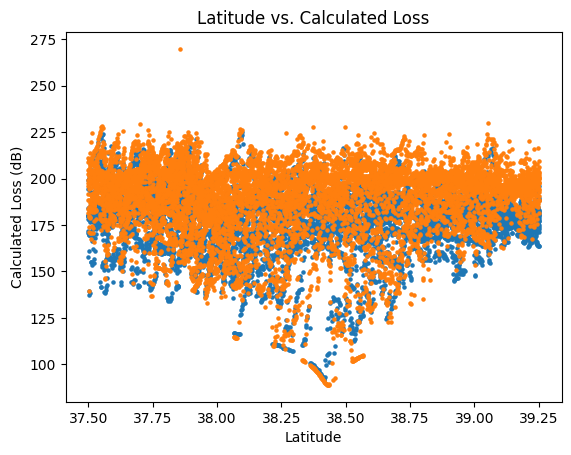

In [42]:
#due to the nature of the data, it's not possible to sensibly graph five of these features on one graph, since the axes would have different units. 
#latitude and longitude are based on geographical location, elevation is in meters, itmlogic and RO are in dB, and difference and perc. change are based on the relationship between the two

plt.scatter(x = comp_450_df["Latitude"], y = comp_450_df["TPA - itmlogic [min]"], s=5)
plt.scatter(x = comp_450_df["Latitude"], y = comp_450_df["TPA - TAP RO"], s=5)
plt.xlabel("Latitude")
plt.ylabel("Calculated Loss (dB)")
plt.title("Latitude vs. Calculated Loss")
plt.show()

In [43]:
# Much more combinations to group on!
df = data('HairEyeColor')
df.head(5)

,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


## **Question 2 (5 points):** Use your visualization to segment the dataset into at least 3 natural groups using any form of Pandas filtering functions. Save each group's data as its own DataFrame.

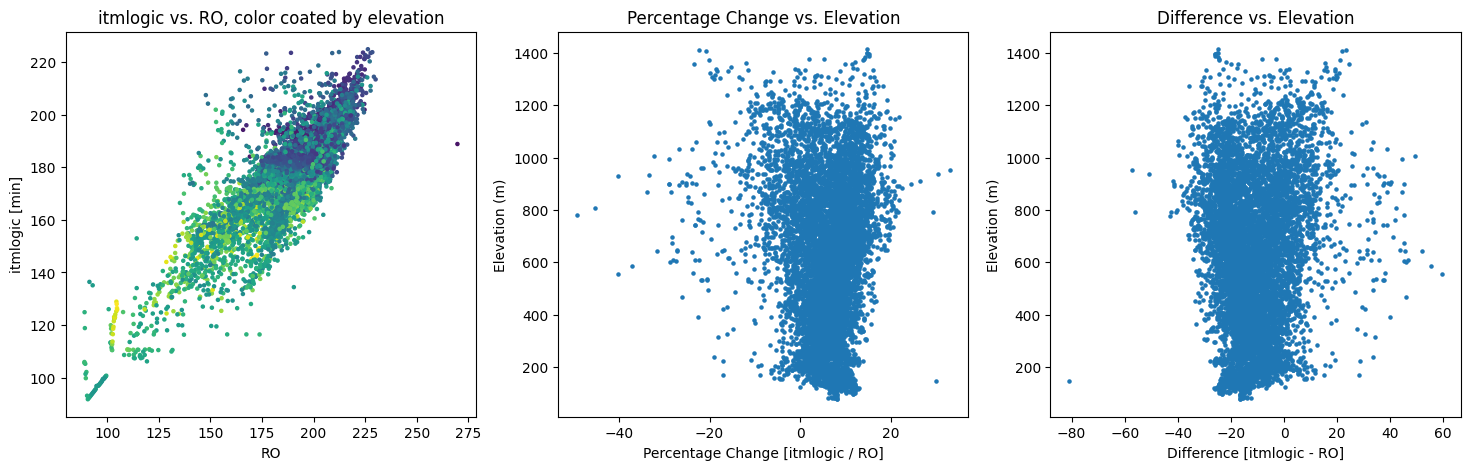

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

axs[0].scatter(x = comp_450_df["TPA - TAP RO"], y = comp_450_df["TPA - itmlogic [min]"], s=5, c = comp_450_df["Elevation (m)"])
axs[0].set_title("itmlogic vs. RO, color coated by elevation")
axs[0].set_ylabel("itmlogic [min]")
axs[0].set_xlabel("RO")

axs[1].scatter(x = comp_450_df["Percentage Change [itmlogic / RO]"], y = comp_450_df["Elevation (m)"], s=5)
axs[1].set_title("Percentage Change vs. Elevation")
axs[1].set_xlabel("Percentage Change [itmlogic / RO]")
axs[1].set_ylabel("Elevation (m)")

axs[2].scatter(x = comp_450_df["Difference [itmlogic - RO]"], y = comp_450_df["Elevation (m)"], s=5)
axs[2].set_title("Difference vs. Elevation")
axs[2].set_xlabel("Difference [itmlogic - RO]")
axs[2].set_ylabel("Elevation (m)")

plt.show()

## **Question 3 (5 points):** Print a summary of each DataFrame including its size, shape, and descriptive statistics using the describe function. Write a few sentences in a text cell on if any relationships emerge and if the results are surprising or expected.

## Part 2: Getting Data From APIs and Web Scraping (30 points)
A great source of data and Pandas practice is getting data from the Internet. Rather than a .csv file, many data will be in a stream of records, typically in XML (eXtensible Mark-up Language) or JSON (JavaScript Object Notation) format.

In the 2nd part of this lab, you will choose from utilizing a simple API for getting and analyzing data through a variety of queries or web scraping a page.

**Web Scraping Examples**
* Any Wikipedia page
  * https://en.wikipedia.org/wiki/Capybara  
  * https://en.m.wikipedia.org/wiki/List_of_common_misconceptions
* https://toscrape.com/
* https://www.scrapethissite.com/
* https://github.com/stanfordjournalism/search-script-scrape


**API Examples**
*   https://pokeapi.co/
  * Example: https://pokeapi.co/api/v2/pokemon?limit=1000&offset=0
* https://place.dog/
* https://dukengn.github.io/Dog-facts-API/  
* https://apiv3.iucnredlist.org/api/v3/docs

A more exhaustive API list can be found at: https://github.com/public-apis/public-apis.



## **Question 1 (5 points):** Pick a URL (several examples are above) to either web scrape data from OR query using an API (no need to do both). Download your initial raw data using the `requests` package and store it in a dictionary.

## Print your dictionary. Observe what kind of data your API or website can produce and design a DataFrame of at least 3 to 4 columns you would like to create. Write the features you plan on obtaining below.



###**URL Chosen:** Text

###**API or Web Scraping:** Text

###**DataFrame Columns:** Feature 1, Feature 2, Feature 3, Feature 4

## **Question 2 (10 points):**
## Create the DataFrame of your selected features. Whether using an API or scraping, you might need to implement loops to extract enough clean features to use. Be creative with using iteration and data structures to get your data! It's highly recommended you implement pseudocode based on your results in Question 1 (rough example below) before building out your code.



### **Pseudocode**


1.  Use requests package on www.XYZ.com and store response
2.  Parse response dictionary and get list of URLs to scrape
3.  Loop through URLs and...
4.  ....
5.  Drop XYZ and XYZ columns to obtain clean DataFrame



## **Question 3 (15 points):** Perform an exploratory analysis on the DataFrame you've created, making modifications to it as necessary. Some example features to explore include:
* If you've scraped text data, plot a few rows of data
* If you've scraped any image URLs, plot a few of them
* Run some value counts on different variables
* If your columns are messy or hard to read, rename them
* Cast data types into a usable state (ie: string to integer for numerical analysis)

## After exploring, produce at least 3 visualizations on interesting aspects (group characteristics, clear relationships between variables) of your data. For each figure, jot down 1 sentence in a text cell on what the data tells you.

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.